(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
uint8
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


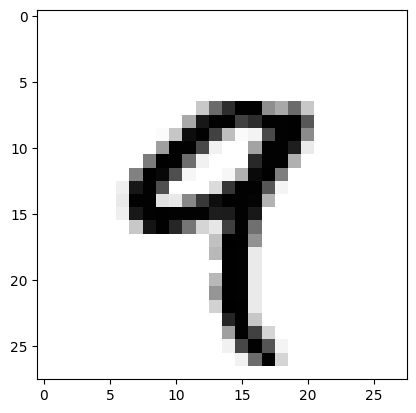

In [3]:
### Loading the MNIST dataset in Keras

from keras.datasets import mnist

#loading the training set and the test set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#looking at the training set
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(train_images.dtype)

#looking at the test set
print(test_images.shape)
print(len(test_labels))
print(test_labels)

#displaying the fourth digit
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
### The network architecture
from keras import Input
from keras import models
from keras import layers

network = models.Sequential()
# Uma camada densa significa que todos os neuronios da camada anterior estão conectados com todos os neuronios da camada atual
network.add(Input(shape=(28 * 28,)))  # Specify the input shape here
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

**Camadas** extraem **representações** dos dados - idealmente, representações mais significativas para o problema em questão. A maior parte do aprendizado profundo consiste em encadear camadas simples que implementarão uma forma de **destilação** progressiva de dados. Um modelo de aprendizado profundo é como uma peneira para processamento de dados, feito de uma sucessão de filtros de dados - as camadas - cada vez mais refinados.

Aqui, nossa rede consiste em uma sequência de duas camadas `Dense`, que são camadas neurais densamente conectadas (também chamadas de **totalmente conectadas**). A segunda (e última) camada é uma camada **softmax** de 10 vias, o que significa que ela retornará uma matriz de 10 pontuações de probabilidade (somando 1). Cada pontuação será a probabilidade de que a imagem atual do dígito pertença a uma de nossas 10 classes de dígitos.

Para preparar a rede para o treinamento, precisamos escolher mais três coisas como parte da etapa de compilação:
- **Função de perda (loss function)**: como a rede será capaz de medir seu desempenho nos dados de treinamento e, assim, como ela será capaz de se orientar na direção certa.
- **Otimizador (optimizer)**: o mecanismo por meio do qual a rede se atualizará com base nos dados que ela vê e em sua função de perda.
- **Métricas para monitorar durante o treinamento e teste**: Aqui, nos importaremos apenas com a precisão (a fração das imagens que foram classificadas corretamente).

In [5]:
### The compilation step
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Antes do treinamento, pré-processaremos os dados remodelando-os na forma que a rede espera e dimensionando-os para que todos os valores estejam no intervalo `[0, 1]`. Anteriormente, nossas imagens de treinamento, por exemplo, eram armazenadas em uma matriz de dimensão `(60000, 28, 28)` do tipo `uint8` com valores no intervalo `[0, 255]`. Transformamos isso em uma matriz `float32` de dimensão `(60000, 28 * 28)` com valores entre 0 e 1.

In [6]:
### Preparing the image data

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Também precisamos codificar categoricamente os rótulos, um passo que será explicado em momento oportuno.

In [7]:
### Preparing the labels

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Agora estamos prontos para treinar a rede, o que no Keras é feito por meio de uma chamada ao método `fit` da rede - ajustamos o modelo aos dados de treinamento.

In [9]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9921 - loss: 0.0282
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9939 - loss: 0.0220
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9959 - loss: 0.0158
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9968 - loss: 0.0113
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9982 - loss: 0.0084


Vamos agora testar o modelo no `test set`.

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9762 - loss: 0.0826


[0.06716083735227585, 0.980400025844574]